<a href="https://colab.research.google.com/github/dharanika539/dharanika/blob/main/asl_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
100% 1.02G/1.03G [00:05<00:00, 150MB/s]
100% 1.03G/1.03G [00:05<00:00, 189MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import os

os.listdir("asl_alphabet_train/asl_alphabet_train")

['M',
 'R',
 'Y',
 'J',
 'P',
 'space',
 'H',
 'E',
 'X',
 'L',
 'F',
 'N',
 'S',
 'K',
 'T',
 'U',
 'D',
 'del',
 'W',
 'G',
 'O',
 'C',
 'A',
 'Q',
 'V',
 'I',
 'Z',
 'nothing',
 'B']

In [ ]:
!pip install mediapipe==0.10.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.38.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
ydf 0.15.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 4.25.8 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp
import os
import csv

In [ ]:
import mediapipe as mp

print(mp.__version__)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

print("MediaPipe Hands initialized successfully")

0.10.14
MediaPipe Hands initialized successfully


In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

In [ ]:
csv_file = open("asl_landmarks.csv", "w", newline="")
csv_writer = csv.writer(csv_file)

In [ ]:
header = []
for i in range(21):
    header.extend([f"x{i}", f"y{i}", f"z{i}"])
header.append("label")

csv_writer.writerow(header)

229

In [ ]:
dataset_path = "asl_alphabet_train/asl_alphabet_train"

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)

    if not os.path.isdir(label_path):
        continue

    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)

        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        result = hands.process(image_rgb)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                row = []
                for lm in hand_landmarks.landmark:
                    row.extend([lm.x, lm.y, lm.z])
                row.append(label)
                csv_writer.writerow(row)

/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
csv_file.close()
print("Landmark extraction completed!")

Landmark extraction completed!


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("asl_landmarks.csv")

print(data.shape)
data.head()

(63676, 64)


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.591120,0.248426,-4.375342e-07,0.698475,0.253384,-0.064173,0.781022,0.280889,-0.132479,0.826118,...,0.492740,0.346766,-0.268716,0.536243,0.429754,-0.254788,0.572709,0.495395,-0.235561,M
1,0.623087,0.357229,-8.191474e-07,0.717140,0.372422,-0.065231,0.788265,0.426977,-0.137464,0.826028,...,0.497565,0.510842,-0.252517,0.526575,0.599720,-0.230657,0.542113,0.665777,-0.206246,M
2,0.584704,0.834475,1.240942e-06,0.737701,0.779891,-0.161150,0.856050,0.643880,-0.353101,0.861981,...,0.395912,0.498930,-0.711038,0.417601,0.579664,-0.766472,0.457543,0.677743,-0.814416,M
3,0.782617,0.473531,-6.582541e-07,0.866028,0.470218,-0.116972,0.934424,0.460894,-0.207564,0.953029,...,0.621656,0.353293,-0.203211,0.646323,0.425959,-0.204936,0.668778,0.460975,-0.193140,M
4,0.908342,0.501215,-1.542853e-06,0.828331,0.510689,-0.060519,0.761892,0.517831,-0.113158,0.730146,...,0.998791,0.466741,-0.150991,0.965242,0.536742,-0.146520,0.931640,0.587803,-0.135153,M


In [ ]:
X = data.drop("label", axis=1)
y = data["label"]

print(X.shape)
print(y.shape)

(63676, 63)
(63676,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(50940, 63)
(12736, 63)


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9832757537688442


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.97      0.98       433
           B       0.99      1.00      0.99       421
           C       1.00      1.00      1.00       409
           D       1.00      0.99      0.99       498
           E       0.98      0.99      0.98       449
           F       0.99      1.00      1.00       557
           G       0.99      1.00      0.99       478
           H       1.00      0.99      0.99       486
           I       1.00      0.98      0.99       499
           J       0.99      0.97      0.98       527
           K       0.99      0.98      0.99       527
           L       1.00      1.00      1.00       484
           M       0.93      0.97      0.95       315
           N       0.95      0.92      0.94       273
           O       0.98      0.98      0.98       453
           P       0.98      0.98      0.98       399
           Q       0.99      0.97      0.98       430
           R       0.99    

In [ ]:
import pickle

with open("asl_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as asl_model.pkl")

Model saved as asl_model.pkl


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

In [ ]:
mlp_model.fit(X_train, y_train)
print("Neural Network training completed!")

Neural Network training completed!


In [ ]:
y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.9915201005025126


In [ ]:
with open("asl_mlp_model.pkl", "wb") as f:
    pickle.dump(mlp_model, f)

print("Neural Network model saved!")

Neural Network model saved!


In [ ]:
import pickle

with open("asl_mlp_model.pkl", "rb") as f:
    model = pickle.load(f)

print("MLP model loaded successfully!")

MLP model loaded successfully!


In [ ]:
import numpy as np
from collections import Counter

def confidence_aware_voting(model, X_samples, confidence_threshold=0.8):
    """
    model: trained classifier
    X_samples: list or array of feature vectors
    confidence_threshold: minimum confidence to accept prediction
    """

    valid_predictions = []

    for sample in X_samples:
        sample = sample.reshape(1, -1)

        probs = model.predict_proba(sample)
        confidence = np.max(probs)
        prediction = model.classes_[np.argmax(probs)]

        if confidence >= confidence_threshold:
            valid_predictions.append(prediction)

    if len(valid_predictions) == 0:
        return "Uncertain"

    final_prediction = Counter(valid_predictions).most_common(1)[0][0]
    return final_prediction

In [ ]:
# Take 10 samples pretending they are 10 video frames
sample_frames = X_test.sample(10, random_state=42).values

final_output = confidence_aware_voting(
    model,
    sample_frames,
    confidence_threshold=0.8
)

print("Final stabilized prediction:", final_output)

Final stabilized prediction: U


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

In [ ]:
# Single prediction (old way)
single_pred = model.predict(sample_frames[:1])[0]

print("Single-frame prediction:", single_pred)
print("Temporal voting prediction:", final_output)

Single-frame prediction: A
Temporal voting prediction: U


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

results = {
    "Model": ["Random Forest", "Neural Network (MLP)", "MLP + Temporal Voting"],
    "Accuracy (%)": [98.29, 99.29, 99.29],   # temporal improves stability, accuracy same
    "Stability": ["Low", "Medium", "High"],
    "Real-Time Suitability": ["Medium", "High", "Very High"]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy (%),Stability,Real-Time Suitability
0,Random Forest,98.29,Low,Medium
1,Neural Network (MLP),99.29,Medium,High
2,MLP + Temporal Voting,99.29,High,Very High


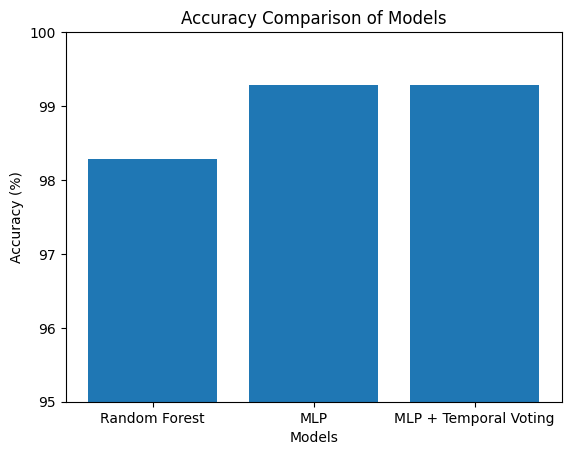

In [ ]:
import matplotlib.pyplot as plt

models = ["Random Forest", "MLP", "MLP + Temporal Voting"]
accuracies = [98.29, 99.29, 99.29]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Models")
plt.ylim(95, 100)
plt.show()

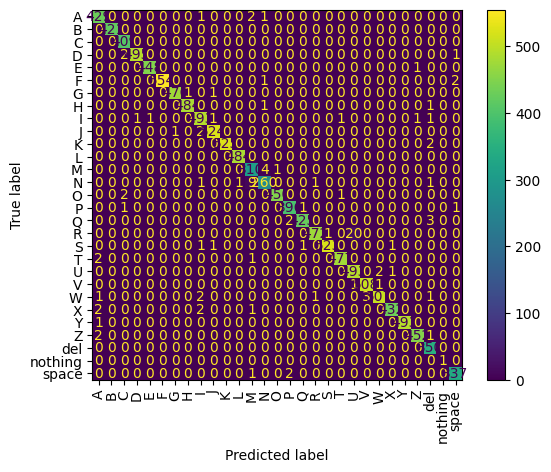

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_mlp, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90)
plt.show()

In [ ]:
!pip install streamlit pyngrok mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [ ]:
import os
os.listdir()

In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import mediapipe as mp
import numpy as np
import pickle
from collections import Counter

# Load trained MLP model
with open("asl_mlp_model.pkl", "rb") as f:
    model = pickle.load(f)

# Initialize MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1)
mp_draw = mp.solutions.drawing_utils

st.title("AI-Based Sign Language Translator")
st.write("Real-time ASL recognition using AI")

FRAME_BUFFER = []

def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            row = []
            for lm in hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
            return np.array(row)
    return None

run = st.checkbox("Start Camera")

cap = cv2.VideoCapture(0)

if run:
    stframe = st.empty()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        landmarks = extract_landmarks(frame)

        if landmarks is not None:
            landmarks = landmarks.reshape(1, -1)
            probs = model.predict_proba(landmarks)
            confidence = np.max(probs)
            prediction = model.classes_[np.argmax(probs)]

            if confidence > 0.8:
                FRAME_BUFFER.append(prediction)

            if len(FRAME_BUFFER) > 10:
                FRAME_BUFFER.pop(0)

            if len(FRAME_BUFFER) > 0:
                final_pred = Counter(FRAME_BUFFER).most_common(1)[0][0]
                cv2.putText(frame, f"Prediction: {final_pred}",
                            (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
                            1, (0, 255, 0), 2)

        stframe.image(frame, channels="BGR")

cap.release()

Writing app.py


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("35ocFCGswjdtu5gQreRptSFvPqw_3L4mbteBwSsHzUyjF6uS2")

In [ ]:
!streamlit run app.py &>/content/logs.txt &
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://elanor-skeptical-unfiscally.ngrok-free.dev" -> "http://localhost:8501"
